In [24]:
import numpy as np
import matplotlib.pyplot as plt
# Read data from files
with open('NLS_Group11.txt','r') as file:
    lines = file.readlines()
    i = 1
    data = []
    while i < 501:
        point = lines[i].split()
        data.append([float(point[0]), float(point[1])])
        i+=1
    class1 = np.array(data)
    data = []
    while i < 1001:
        point = lines[i].split()
        data.append([float(point[0]), float(point[1])])
        i+=1
    class2 = np.array(data)
    data = []
    while i < 1701:
        point = lines[i].split()
        data.append([float(point[0]), float(point[1])])
        i+=1
    class3 = np.array(data)
print(class1[:10])
print(class2[:10])
print(class3[:10])

[[ 0.675839 -0.221109]
 [-0.544258 -0.513276]
 [ 0.522613 -0.499236]
 [ 0.49009  -0.346473]
 [ 0.50347  -0.432488]
 [ 0.606569 -0.143063]
 [-0.507774 -0.54321 ]
 [-0.660941 -0.149509]
 [ 0.690794 -0.006358]
 [-0.648933 -0.273169]]
[[ 1.158298  0.613937]
 [ 1.377077  0.058263]
 [-1.044622 -1.05563 ]
 [ 1.118368  0.45561 ]
 [ 0.70017   1.329269]
 [ 1.522522  0.395424]
 [-1.378594  0.678167]
 [ 0.743791 -1.086453]
 [-0.446414  1.170552]
 [ 1.201436 -0.31672 ]]
[[ 2.224947  1.261673]
 [ 1.615975  1.661882]
 [ 0.592875  2.360452]
 [-1.086213 -1.816503]
 [-2.083724  0.572567]
 [-1.10533  -2.120338]
 [ 1.692823  1.865969]
 [ 2.160815  1.192021]
 [-0.928189 -2.06303 ]
 [-2.01113  -1.371044]]


In [25]:
def manual_train_test_split(data, train_size=0.7):
    np.random.shuffle(data)
    split_index = int(train_size * len(data))
    return data[:split_index], data[split_index:]
train_data1, test_data1 = manual_train_test_split(class1)
train_data2, test_data2 = manual_train_test_split(class2)
train_data3, test_data3 = manual_train_test_split(class3)

# Combine data from all classes
train_data = np.vstack((train_data1, train_data2, train_data3))
train_labels = np.array([0]*len(train_data1) + [1]*len(train_data2) + [2]*len(train_data3))

test_data = np.vstack((test_data1, test_data2, test_data3))
test_labels = np.array([0]*len(test_data1) + [1]*len(test_data2) + [2]*len(test_data3))
print("Train Data is:")
print(train_data[:10])
print("Test Data is:")     
print(test_data[:10])

Train Data is:
[[ 0.441621 -0.426455]
 [ 0.547624 -0.401188]
 [-0.095862 -0.726198]
 [-0.570433 -0.252564]
 [-0.355306 -0.478608]
 [ 0.07322  -0.661207]
 [-0.125069 -0.68701 ]
 [ 0.619345 -0.171448]
 [-0.67716  -0.074882]
 [ 0.684203 -0.089035]]
Test Data is:
[[-0.309665 -0.541644]
 [ 0.471692 -0.44646 ]
 [-0.457874 -0.421104]
 [ 0.330938 -0.585902]
 [ 0.331423 -0.47202 ]
 [-0.18582  -0.59059 ]
 [ 0.475851 -0.577436]
 [-0.145154 -0.712651]
 [-0.677398 -0.07131 ]
 [ 0.447574 -0.476493]]


In [26]:
def compute_mean_cov(data):
    return np.mean(data, axis=0), np.cov(data.T)

mean1, cov1 = compute_mean_cov(train_data[train_labels == 0])
mean2, cov2 = compute_mean_cov(train_data[train_labels == 1])
mean3, cov3 = compute_mean_cov(train_data[train_labels == 2])
print(mean1,mean2,mean3)
print(cov1,cov2,cov3)
meanarr=np.array([mean1,mean2,mean3])

[ 3.56528571e-04 -4.26685211e-01] [-0.0096033   0.00582876] [-0.10237116 -0.0428008 ]
[[0.21738104 0.00062365]
 [0.00062365 0.04609514]] [[ 1.03100072 -0.01241011]
 [-0.01241011  0.95974418]] [[2.66067637 0.14656823]
 [0.14656823 2.78431808]]


In [27]:
def gaussian_density(x, mean, cov):
    d = x - mean
    inv_cov = np.linalg.inv(cov)
    det_cov = np.linalg.det(cov)
    exponent = -0.5 * np.dot(np.dot(d.T, inv_cov), d)
    normalization = 1.0 / (2 * np.pi * np.sqrt(det_cov))
    return normalization * np.exp(exponent)

# Posterior probability function
def posterior_probability(x, mean, cov, prior):
    likelihood = gaussian_density(x, mean, cov)
    posterior = likelihood * prior
    return posterior

# Classify based on posterior probability
def classify_2(x,mean1,mean2,cov1,cov2,priors):
    post_class1 = posterior_probability(x, mean1, cov1, priors[0])
    post_class2 = posterior_probability(x, mean2, cov2, priors[1])
    return np.argmax([post_class1, post_class2])
def classify(x, mean1, mean2, mean3, cov1,cov2,cov3, priors):
    post_class1 = posterior_probability(x, mean1, cov1, priors[0])
    post_class2 = posterior_probability(x, mean2, cov2, priors[1])
    post_class3 = posterior_probability(x, mean3, cov3, priors[2])
    return np.argmax([post_class1, post_class2, post_class3])


In [28]:
priors = np.array([len(train_data1), len(train_data2), len(train_data3)]) / len(train_data)

In [47]:
def confusion_matrix(true_labels, predictions, num_classes):
    cm = np.zeros((num_classes, num_classes), dtype=int)
    for true, pred in zip(true_labels, predictions):
        cm[true, pred] += 1
    return cm

def accuracy_score(true_labels, predictions):
    return np.mean(np.array(true_labels) == np.array(predictions))

def precision_score(true_labels, predictions, num_classes):
    cm = confusion_matrix(true_labels, predictions, num_classes)
    numerator = np.diag(cm)
    denominator=np.sum(cm,axis=0)
    precision= np.divide(numerator, denominator, out=np.zeros_like(numerator, dtype=float), where=denominator!=0)
    return precision

def recall_score(true_labels, predictions, num_classes):
    cm = confusion_matrix(true_labels, predictions, num_classes)
    numerator = np.diag(cm)
    denominator=np.sum(cm,axis=1)
    recall= np.divide(numerator, denominator, out=np.zeros_like(numerator, dtype=float), where=denominator!=0)
    return recall 

def f1_score(true_labels, predictions, num_classes):
    precision = precision_score(true_labels, predictions, num_classes)
    recall = recall_score(true_labels, predictions, num_classes)
    numerator = 2 * (precision * recall)
    denominator=precision+recall
    f1 = np.divide(numerator, denominator, out=np.zeros_like(numerator, dtype=float), where=denominator!=0)
    return f1


def compute_metrics(true_labels, predictions, num_classes):
    cm = confusion_matrix(true_labels, predictions, num_classes)
    accuracy = accuracy_score(true_labels, predictions)
    precision = precision_score(true_labels, predictions, num_classes)
    mean_precision = np.mean(precision)
    recall = recall_score(true_labels, predictions, num_classes)
    mean_recall = np.mean(recall)
    f1 = f1_score(true_labels, predictions, num_classes)
    mean_f1 = np.mean(f1)

    return cm, accuracy, precision, mean_precision, recall, mean_recall, f1, mean_f1
def print_metrics(title, metrics):
    cm, accuracy, precision, mean_precision, recall, mean_recall, f1, mean_f1 = metrics
    print(f"{title}")
    print("Confusion Matrix:")
    print(cm)
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Mean Precision: {mean_precision}")
    print(f"Recall: {recall}")
    print(f"Mean Recall: {mean_recall}")
    print(f"F-measure: {f1}")
    print(f"Mean F-measure: {mean_f1}\n")   

In [30]:
def plot_decision_region(train_data, train_labels, classifier, title, priors):
    # Define grid limits
    x_min, x_max = train_data[:, 0].min() - 1, train_data[:, 0].max() + 1
    y_min, y_max = train_data[:, 1].min() - 1, train_data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    # Apply classifier over the grid points
    Z = np.array([classifier(np.array([x, y]), priors) for x, y in zip(xx.ravel(), yy.ravel())])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.3)

    # Scatter plot for training data
    scatter = plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, edgecolor='k')

    # Add title and axis labels
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

    # Add a legend using scatter.legend_elements()
    legend1 = plt.legend(handles=scatter.legend_elements()[0], 
                         labels=[str(label) for label in np.unique(train_labels)],  # Convert labels to strings
                         title="Classes", loc="upper right")

    plt.show()
def plot_decision_region_2(train_data, train_labels, classifier, mean1, mean2,title,priors,class_pair):
    x_min, x_max = train_data[:, 0].min() - 1, train_data[:, 0].max() + 1
    y_min, y_max = train_data[:, 1].min() - 1, train_data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    # Apply classifier over the grid points
    Z = np.array([classifier(np.array([x, y]), mean1, mean2, priors) for x, y in zip(xx.ravel(), yy.ravel())])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.3)

    # Scatter plot for training data
    scatter = plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, edgecolor='k')

    # Add title and axis labels
    plt.title(title)
    plt.xlabel('Class ' + str(class_pair[0]))
    plt.ylabel('Class ' + str(class_pair[1]))

    # Add legend using scatter.legend_elements()
    legend1 = plt.legend(handles=scatter.legend_elements()[0], 
                         labels=['Class ' + str(class_pair[0]), 'Class ' + str(class_pair[1])],
                         loc="upper right")

    plt.show()
def plot_contour(train_data, train_labels, means, covs, title):
    x_min, x_max = train_data[:, 0].min() - 1, train_data[:, 0].max() + 1
    y_min, y_max = train_data[:, 1].min() - 1, train_data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    plt.figure(figsize=(8, 6))

    # Plot contours for each class
    for mean, cov in zip(means, covs):
        Z = np.array([gaussian_density(np.array([x, y]), mean, cov) for x, y in zip(xx.ravel(), yy.ravel())])
        Z = Z.reshape(xx.shape)
        plt.contour(xx, yy, Z, levels=5, alpha=0.75)

    plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, edgecolor='k')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

def pairdata(train_data,train_labels,class_pair):
    class1, class2 = class_pair
    pair_data = train_data[(train_labels == class1) | (train_labels == class2)]
    pair_labels = train_labels[(train_labels == class1) | (train_labels == class2)]
    pair_labels[pair_labels == class1] = 0
    pair_labels[pair_labels == class2] = 1
    return [pair_data,pair_labels]


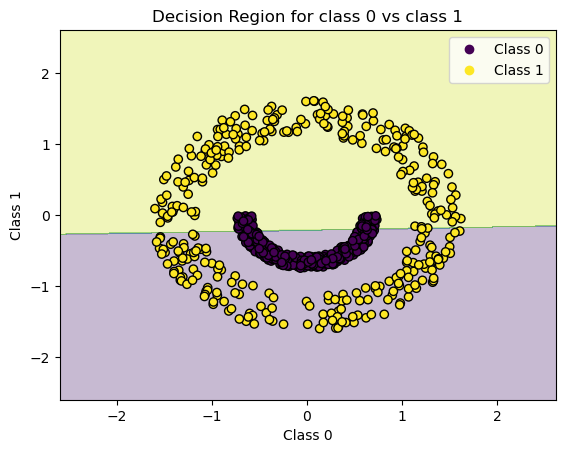

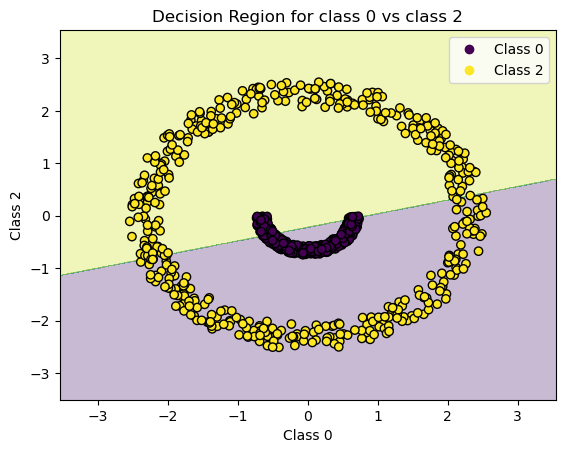

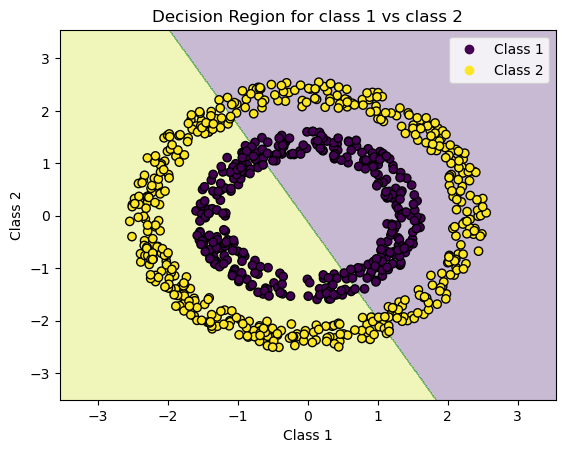

In [31]:
# Implement classifiers
sigma_squared = (cov1 + cov2 + cov3) / 3
sigma_squared_identity = np.diag(np.diag(sigma_squared))

def classifier_sigma_squared_identity(x, priors):
    return classify(x, mean1, mean2, mean3, sigma_squared_identity,sigma_squared_identity,sigma_squared_identity, priors)
def classifier_sigma_squared_identity_2(x,mean1,mean2,priors):
    return classify_2(x, mean1, mean2,sigma_squared_identity,sigma_squared_identity,priors)    
    
class_pairs=[(0,1),(0,2),(1,2)]
for i in class_pairs:
    pair_data,pair_labels=pairdata(train_data,train_labels,i)
    m1,m2=meanarr[i[0]],meanarr[i[1]]
    title=f'Decision Region for class {i[0]} vs class {i[1]}'
    plot_decision_region_2(pair_data,pair_labels,classifier_sigma_squared_identity_2,m1,m2,title,[0.5,0.5],i)

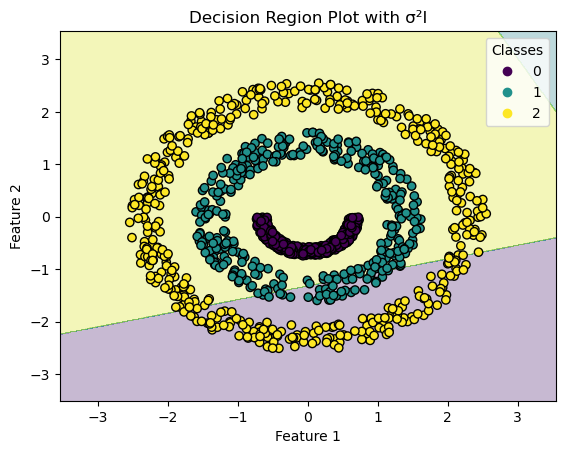

In [32]:
#DECISION REGION FOR ALL THE CLASSES
plot_decision_region(train_data, train_labels, classifier_sigma_squared_identity, "Decision Region Plot with σ²I",priors)

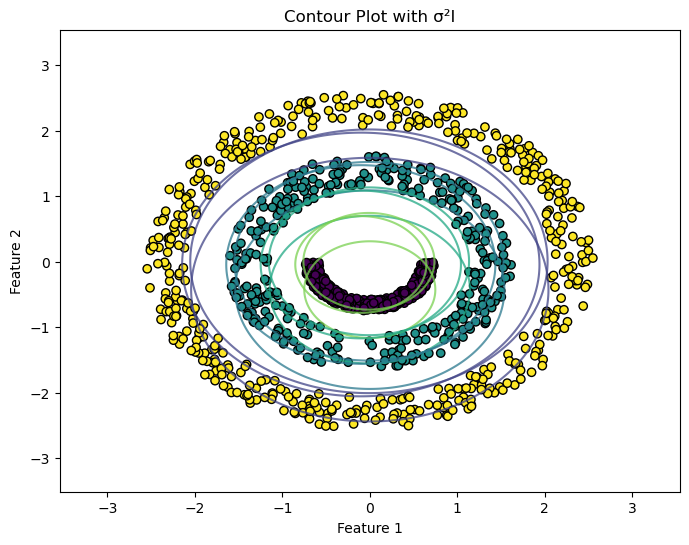

In [33]:

plot_contour(train_data, train_labels, [mean1, mean2, mean3], [sigma_squared_identity]*3, "Contour Plot with σ²I")

In [48]:
predictions_sigma_squared_identity = np.array([classifier_sigma_squared_identity(x, priors) for x in test_data])
metrics_sigma_squared_identity = compute_metrics(test_labels, predictions_sigma_squared_identity, 3)
print_metrics("Classifier with σ²I", metrics_sigma_squared_identity)

Classifier with σ²I
Confusion Matrix:
[[  0   0 150]
 [ 17   0 133]
 [ 61   0 150]]
Accuracy: 0.29354207436399216
Precision: [0.         0.         0.34642032]
Mean Precision: 0.11547344110854503
Recall: [0.         0.         0.71090047]
Mean Recall: 0.23696682464454977
F-measure: [0.         0.         0.46583851]
Mean F-measure: 0.15527950310559005



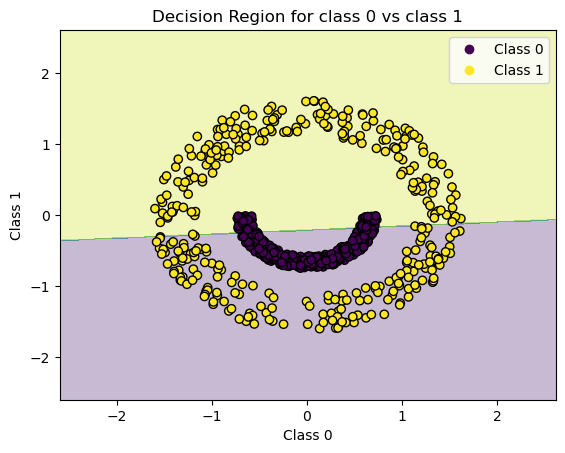

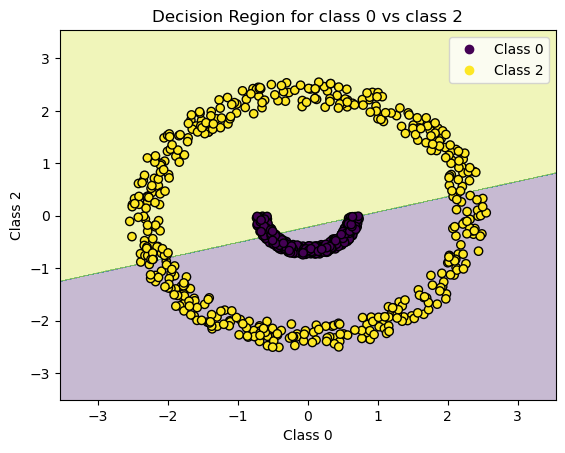

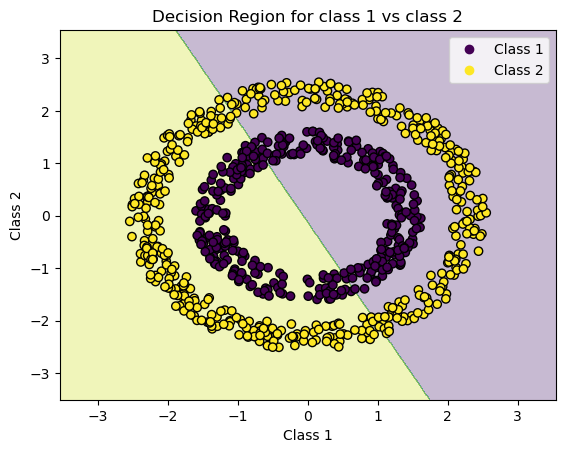

In [35]:
#Full covariasnce
cov_avg = (cov1 + cov2 + cov3) / 3
def classifier_full_covariance(x, priors):
    return classify(x, mean1, mean2, mean3, cov_avg,cov_avg,cov_avg, priors)
def classifier_full_covariance_2(x,mean1,mean2,priors):
    return classify_2(x, mean1, mean2,cov_avg,cov_avg,priors)    
class_pairs=[(0,1),(0,2),(1,2)]
for i in class_pairs:
    pair_data,pair_labels=pairdata(train_data,train_labels,i)
    m1,m2=meanarr[i[0]],meanarr[i[1]]
    title=f'Decision Region for class {i[0]} vs class {i[1]}'
    plot_decision_region_2(pair_data,pair_labels,classifier_full_covariance_2,m1,m2,title,[0.5,0.5],i)

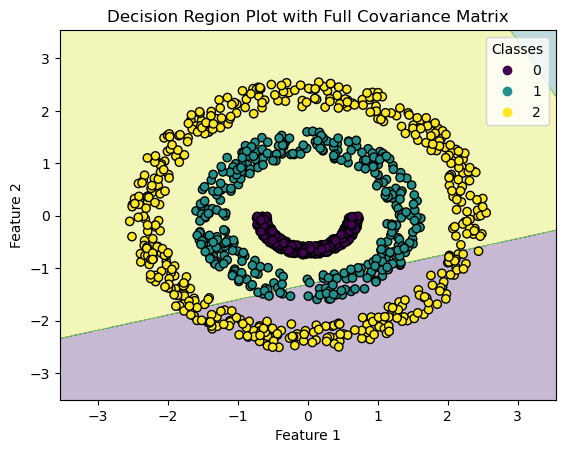

In [36]:
#decision for all classes using full covariance
plot_decision_region(train_data, train_labels, classifier_full_covariance, "Decision Region Plot with Full Covariance Matrix",priors)

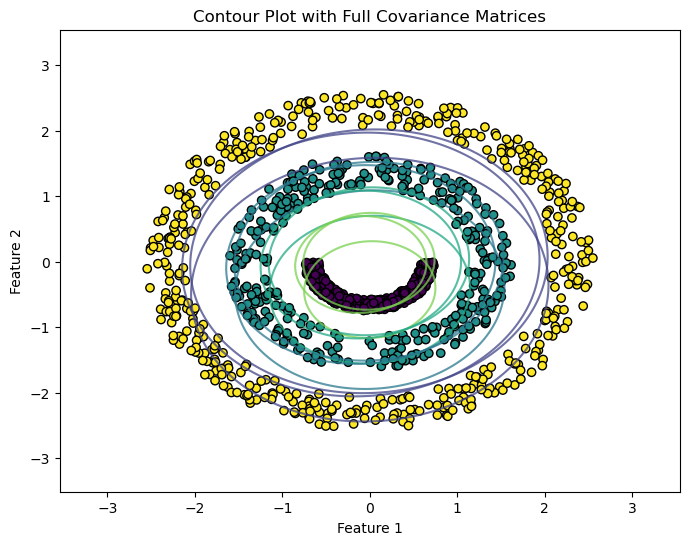

In [37]:
#Contour for all 3 classes using full covariance
plot_contour(train_data, train_labels, [mean1, mean2, mean3], [cov_avg]*3, "Contour Plot with Full Covariance Matrices")

In [49]:
predictions_full_covariance = np.array([classifier_full_covariance(x, priors) for x in test_data])
metrics_full_covariance = compute_metrics(test_labels, predictions_full_covariance, 3)
print_metrics("Classifier with Full Covariance Matrix Σ", metrics_full_covariance)

Classifier with Full Covariance Matrix Σ
Confusion Matrix:
[[  0   0 150]
 [ 17   0 133]
 [ 62   0 149]]
Accuracy: 0.29158512720156554
Precision: [0.         0.         0.34490741]
Mean Precision: 0.11496913580246913
Recall: [0.         0.         0.70616114]
Mean Recall: 0.23538704581358608
F-measure: [0.         0.         0.46345257]
Mean F-measure: 0.15448418869880767



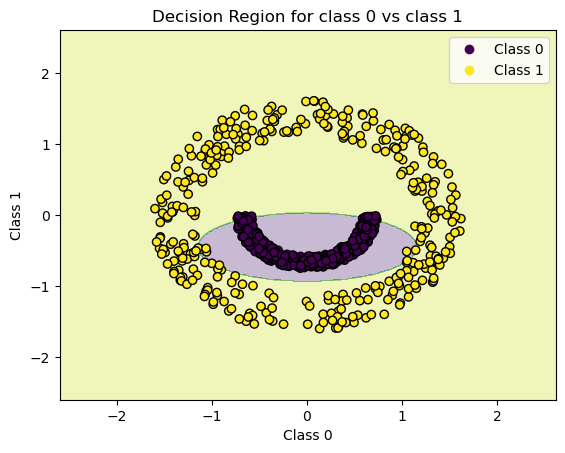

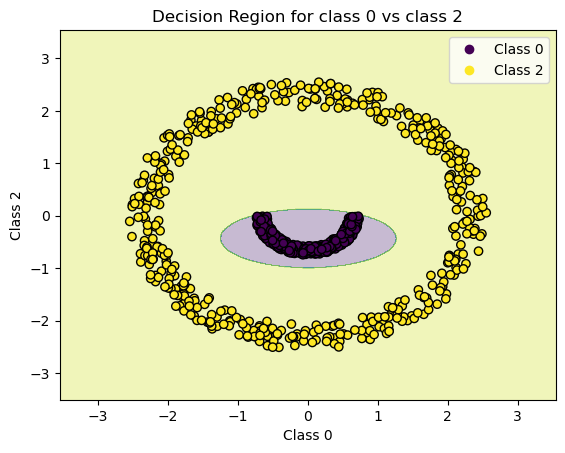

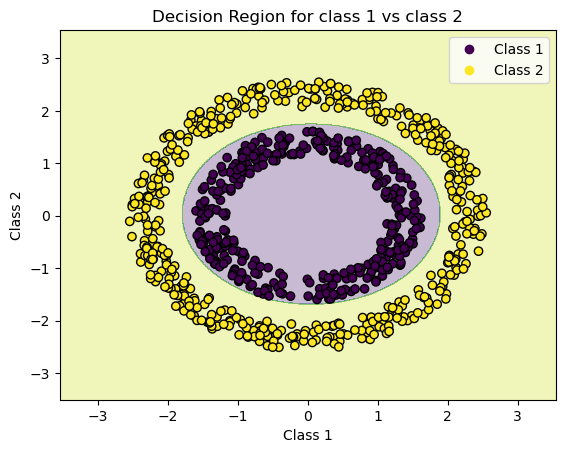

In [39]:
diag_cov1 = np.diag(np.diag(cov1))
diag_cov2 = np.diag(np.diag(cov2))
diag_cov3 = np.diag(np.diag(cov3))
diagcovarr=np.array([diag_cov1,diag_cov2,diag_cov3])
def classifier_diag_covariance(x, priors):
    return classify(x, mean1, mean2, mean3, diag_cov1, diag_cov2, diag_cov3, priors)  
def classifier_diag_covariance_2(x,mean1,mean2,priors):
    cov1,cov2= diagcovarr[np.where(meanarr == mean1)[0][0]] , diagcovarr[np.where(meanarr == mean2)[0][0]]
    return classify_2(x, mean1, mean2,cov1,cov2,priors)    
class_pairs=[(0,1),(0,2),(1,2)]
for i in class_pairs:
    pair_data,pair_labels=pairdata(train_data,train_labels,i)
    m1,m2=meanarr[i[0]],meanarr[i[1]]
    title=f'Decision Region for class {i[0]} vs class {i[1]}'
    plot_decision_region_2(pair_data,pair_labels,classifier_diag_covariance_2,m1,m2,title,[0.5,0.5],i)

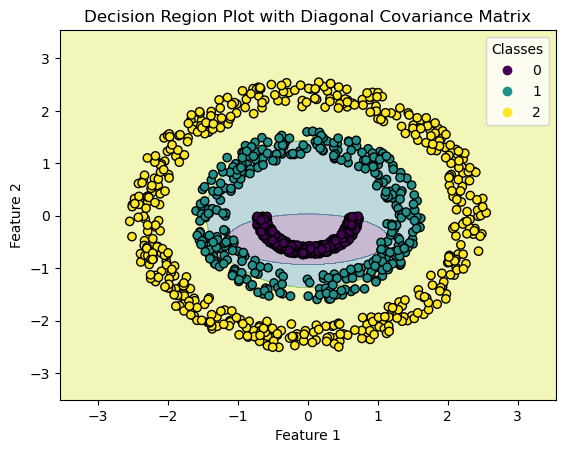

In [40]:
#decision for all classes using diagonal covariance
plot_decision_region(train_data, train_labels, classifier_diag_covariance, "Decision Region Plot with Diagonal Covariance Matrix",priors)

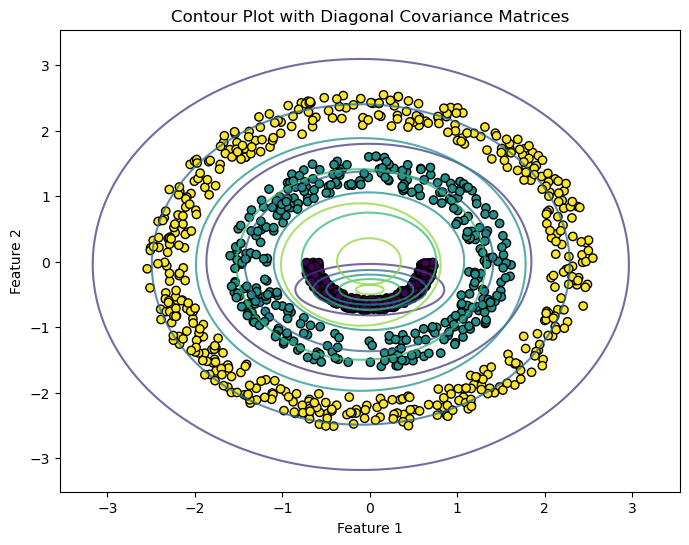

In [41]:
#contour plot for diagonal covariance matrix
plot_contour(train_data, train_labels, [mean1, mean2, mean3], [diag_cov1, diag_cov2, diag_cov3], "Contour Plot with Diagonal Covariance Matrices")

In [42]:
predictions_diag_covariance = np.array([classifier_diag_covariance(x, priors) for x in test_data])
metrics_diag_covariance = compute_metrics(test_labels, predictions_diag_covariance, 3)
print_metrics("Classifier with Diagonal Covariance Matrix", metrics_diag_covariance)

Classifier with Diagonal Covariance Matrix
Confusion Matrix:
[[140  10   0]
 [  3  81  66]
 [  0   0 211]]
Accuracy: 0.8454011741682974
Precision: [0.97902098 0.89010989 0.76173285]
Mean Precision: 0.8769545737054761
Recall: [0.93333333 0.54       1.        ]
Mean Recall: 0.8244444444444445
F-measure: [0.9556314  0.67219917 0.8647541 ]
Mean F-measure: 0.8308615559341811



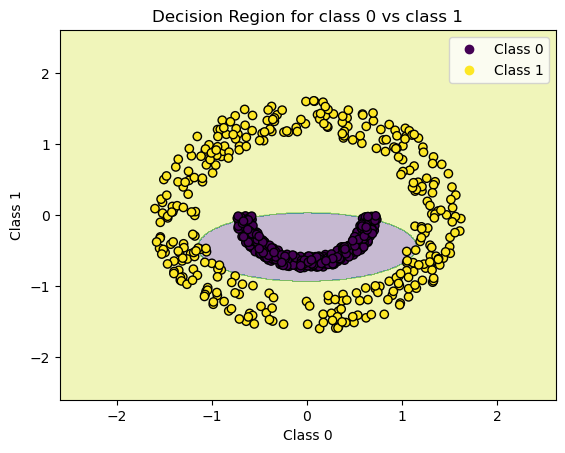

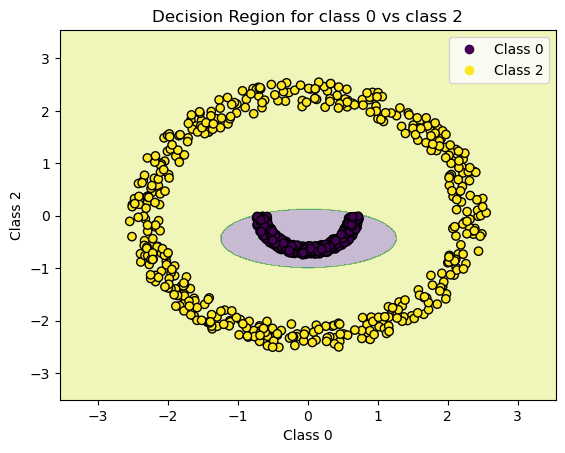

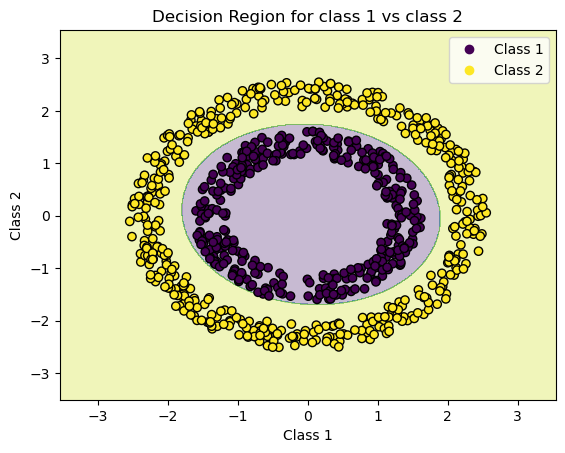

In [43]:
covarr=np.array([cov1,cov2,cov3])
def classifier_full_covariance_per_class(x, priors):
    return classify(x, mean1, mean2, mean3, cov1, cov2, cov3, priors)  
def classifier_full_covariance_per_class_2(x,mean1,mean2,priors):
    cov1,cov2= covarr[np.where(meanarr == mean1)[0][0]] ,covarr[np.where(meanarr == mean2)[0][0]]
    return classify_2(x, mean1, mean2,cov1,cov2,priors)    
class_pairs=[(0,1),(0,2),(1,2)]
for i in class_pairs:
    pair_data,pair_labels=pairdata(train_data,train_labels,i)
    m1,m2=meanarr[i[0]],meanarr[i[1]]
    title=f'Decision Region for class {i[0]} vs class {i[1]}'
    plot_decision_region_2(pair_data,pair_labels,classifier_full_covariance_per_class_2,m1,m2,title,[0.5,0.5],i)

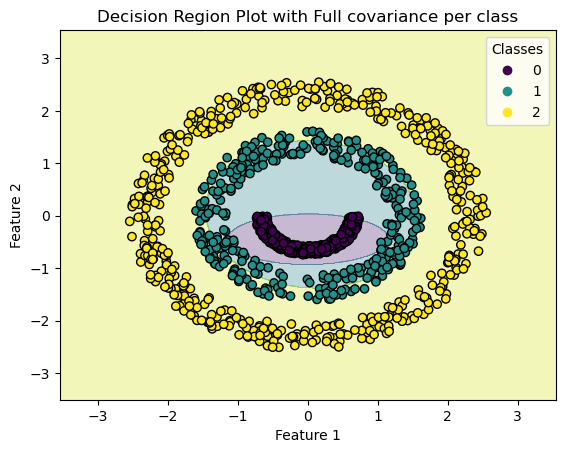

In [44]:
plot_decision_region(train_data, train_labels, classifier_full_covariance_per_class, "Decision Region Plot with Full covariance per class",priors)

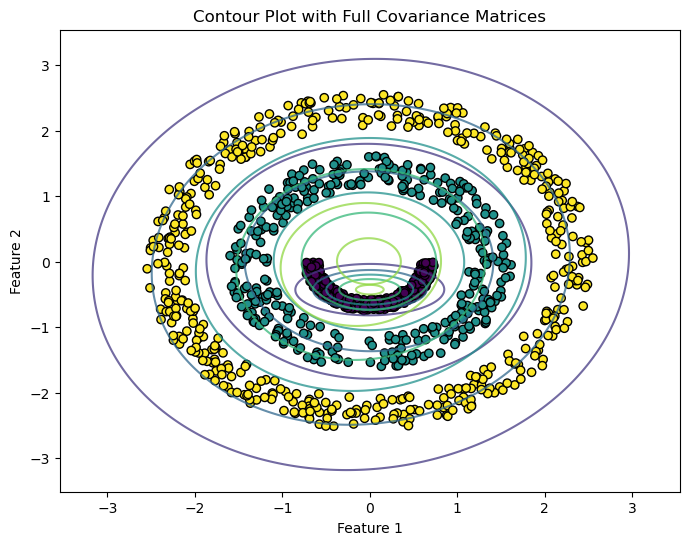

In [45]:
#contour plot full covariance per class
plot_contour(train_data, train_labels, [mean1, mean2, mean3], [cov1, cov2, cov3], "Contour Plot with Full Covariance Matrices")

In [46]:
predictions_full_covariance_per_class = np.array([classifier_full_covariance_per_class(x, priors) for x in test_data])
metrics_full_covariance_per_class = compute_metrics(test_labels, predictions_full_covariance_per_class, 3)
print_metrics("Classifier with Full Covariance Matrix per Class", metrics_full_covariance_per_class)

Classifier with Full Covariance Matrix per Class
Confusion Matrix:
[[140  10   0]
 [  3  80  67]
 [  0   0 211]]
Accuracy: 0.8434442270058709
Precision: [0.97902098 0.88888889 0.75899281]
Mean Precision: 0.875634224555088
Recall: [0.93333333 0.53333333 1.        ]
Mean Recall: 0.8222222222222223
F-measure: [0.9556314  0.66666667 0.86298569]
Mean F-measure: 0.8284279170185491

